Basic Statistical Description:
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000

Check for Null Values:
Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

Aggregated Data:
          Calories    Duration
min      50.300000   15.000000
max    1860.400000  300.000000
count   169.000000  169.000000
mean    375.790244   63.846154


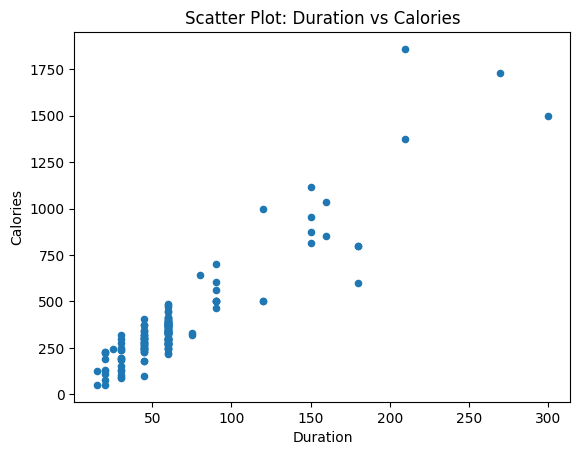

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/data.csv')
print("Basic Statistical Description:")
print(df.describe())
print("\nCheck for Null Values:")
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)
agg_columns = ['Calories', 'Duration']
agg_result = df[agg_columns].agg(['min', 'max', 'count', 'mean'])
print("\nAggregated Data:")
print(agg_result)
filtered_df1 = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
filtered_df2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
df_modified = df.drop(columns=['Maxpulse'])
df.drop(columns=['Maxpulse'], inplace=True)
df['Calories'] = df['Calories'].astype(int)
df.plot.scatter(x='Duration', y='Calories', title='Scatter Plot: Duration vs Calories')
plt.show()

Frist few rows of the data frame
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
Mean Squared Error (Train): 29793161.082422983
Mean Squared Error (Test): 35301898.887134895


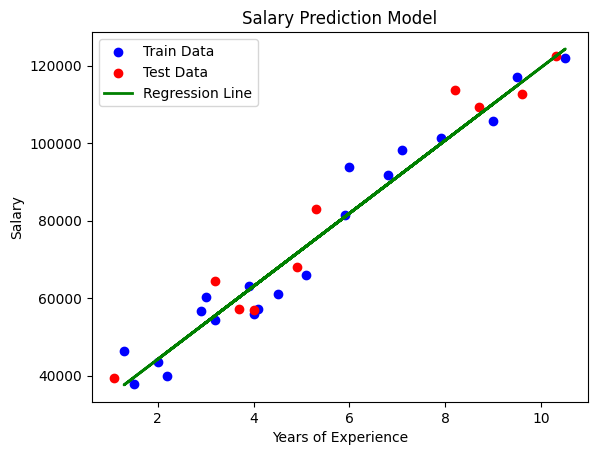

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# a) Import the given “Salary_Data.csv”
data = pd.read_csv("/content/Salary_Data (2).csv")
print("Frist few rows of the data frame")
print(data.head())
# b) Split the data into train_test partitions
X = data[['YearsExperience']]  # Assuming the independent variable is in the 'YearsExperience' column
y = data['Salary']              # Assuming the dependent variable is in the 'Salary' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# c) Train and predict the model
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# d) Calculate the mean_squared error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error (Train): {mse_train}")
print(f"Mean Squared Error (Test): {mse_test}")

# e) Visualize both train and test data using scatter plot
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_train_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction Model')
plt.legend()
plt.show()